In [326]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier,VotingClassifier


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [297]:
!pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---

In [299]:
import xgboost as xgb

In [4]:
#Load Data
train = pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\mini_hackathon\train.csv")
test=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\mini_hackathon\test.csv")
submission_data=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\mini_hackathon\sample_submission.csv")

In [7]:
#columns based on datatypes seperated
ignore_col=['employee_id']
target_col=['is_promoted']
num_col=[]
cat_col=[]
for col in train.columns:
    if col not in ignore_col + target_col:
        if train[col].dtypes == 'object':
            cat_col.append(col)
        else:
            num_col.append(col)

In [15]:
#categorical and numerical columns imputed and encoded
#categorical columns imputed by mode and encoded by onehotencoder
#numerical columns imputed by median and encoded by standardscalar
cat_pipe_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])
num_pip_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('standardscalar',StandardScaler())
])
## map tranformation to features
preprocess=ColumnTransformer(
    transformers=[
        ('cat_encode',cat_pipe_encode,cat_col),
        ('num_encode',num_pip_encode,num_col)
    ]
)

In [17]:
#model pipeline with preprocess and logistic regression model
model_pipeline1=Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('model',LogisticRegression())
    ]
)

In [19]:
X=train.drop(columns=target_col+ignore_col)
y=train[target_col]

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=42, test_size=0.3)
model_pipeline1.fit(train_X, train_y)
predicted_train_tgt = model_pipeline1.predict(train_X)
predicted_val_tgt = model_pipeline1.predict(val_X)
print("f1score",f1_score(train_y,predicted_train_tgt))
print("f1score",f1_score(val_y,predicted_val_tgt))

f1score 0.3987313094698686
f1score 0.39184597961494905


In [24]:
test_predict=model_pipeline1.predict(test)
submission_data['is_promoted']=model_pipeline1.predict(test)
submission_data.to_csv('submission_logistic.csv',index=False)

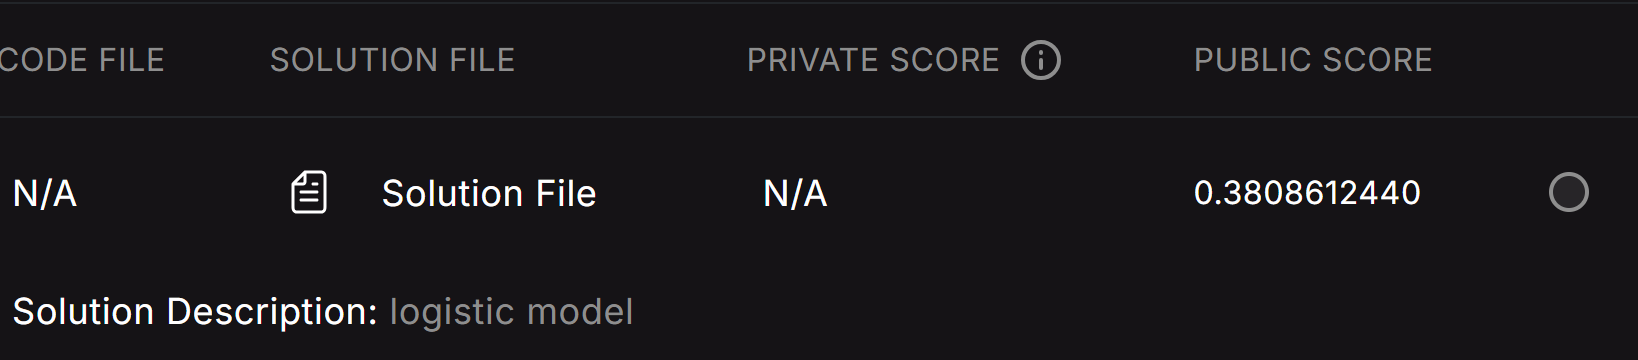

In [60]:
#preprocessing and model
model_pipeline=Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('model',DecisionTreeClassifier())
])

In [39]:
X=train.drop(columns=target_col+ignore_col)
y=train[target_col]

In [41]:
print(X.head(2))
print(y.head(2))

          department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   

   KPIs_met >80%  awards_won?  avg_training_score  
0              1            0                  49  
1              0            0                  60  
   is_promoted
0            0
1            0


In [43]:
#splitting data
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=42, test_size=0.3)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((38365, 12), (16443, 12), (38365, 1), (16443, 1))

In [45]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscalar',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', DecisionTreeClassifier())])

In [49]:
predicted_train_tgt = model_pipeline.predict(train_X)
predicted_val_tgt = model_pipeline.predict(val_X)
print("f1score",f1_score(train_y,predicted_train_tgt))
print("f1score",f1_score(val_y,predicted_val_tgt))

f1score 0.9987991594115881
f1score 0.4185886402753873


In [57]:
submission_data['is_promoted']=model_pipeline.predict(test)

In [59]:
#result of decision tree
submission_data.to_csv('submission1.csv',index=False)

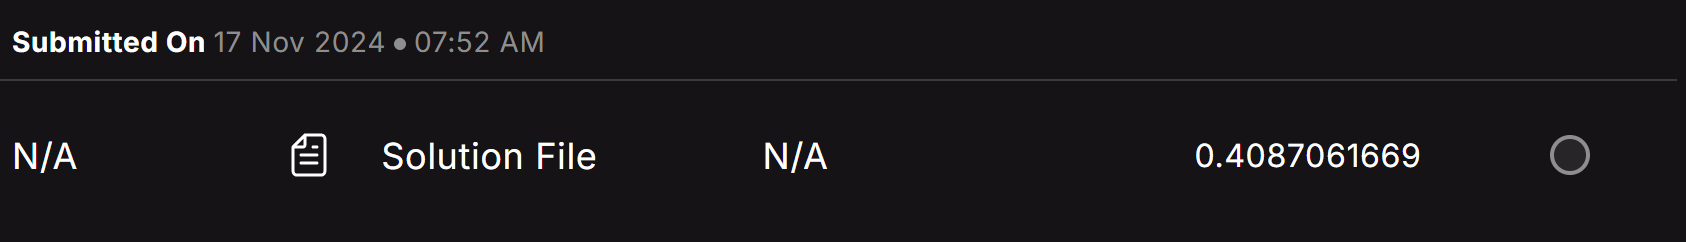

In [28]:
# i choose decision tree as my basemodel
# still now tried with unbalanced data now convert data into balanced data
# next steps : applying under sampling and over sampling on top of decision tree

In [120]:
def model_fun(train_X,train_y,val_X,val_y,model,csvname,metric):
    #train the model
    model.fit(train_X, train_y)

    #make predictions
    predicted_train_tgt = model.predict(train_X)
    predicted_val_tgt = model.predict(val_X)

    #evaluate f1 score
    print(f"{metric}",metric(train_y,predicted_train_tgt))
    print(f"{metric}",metric(val_y,predicted_val_tgt))
    
    submission_data['is_promoted']=model.predict(test)
    
    submission_data.to_csv(f'{csvname}.csv', index=False)


In [122]:
train['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [124]:
# undersampling
under_sampling=RandomUnderSampler()
train_X_under_sampled,train_y_under_sampled=under_sampling.fit_resample(train_X,train_y)
under_balanced_data=pd.concat([train_X_under_sampled,train_y_under_sampled] , axis =1)
print(under_balanced_data['is_promoted'].value_counts())
under_balanced_data.head(2)

is_promoted
0    3335
1    3335
Name: count, dtype: int64


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
32487,Finance,region_2,Bachelor's,m,sourcing,2,27,NaN,1,0,0,61,0
25602,Procurement,region_21,Bachelor's,m,other,1,26,NaN,1,0,0,66,0


In [126]:
#apply undersampling data to decisiontree 
model_fun(train_X_under_sampled,train_y_under_sampled,val_X,val_y,model_pipeline,"decisiontree_undersampling",accuracy_score)

<function accuracy_score at 0x00000296B60A9F80> 0.9998500749625188
<function accuracy_score at 0x00000296B60A9F80> 0.763668430335097


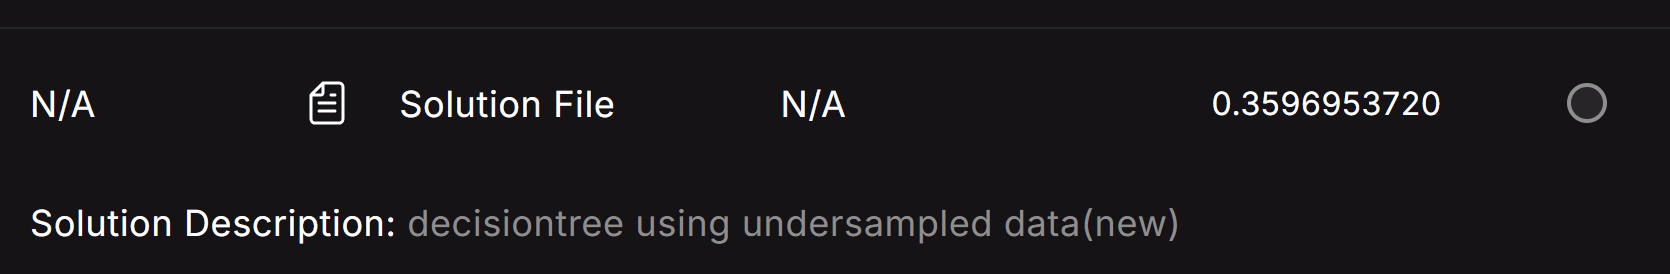

In [129]:
#over_sampling
over_sampling=RandomOverSampler()
train_X_over_sampled,train_y_over_sampled=over_sampling.fit_resample(train_X,train_y)
over_balanced_data=pd.concat([train_X_over_sampled,train_y_over_sampled] , axis =1)
print(over_balanced_data['is_promoted'].value_counts())
over_balanced_data.head()

is_promoted
0    35030
1    35030
Name: count, dtype: int64


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Technology,region_12,Bachelor's,m,other,2,26,2.0,3,0,0,77,0
1,Procurement,region_23,Bachelor's,f,other,1,27,4.0,4,1,0,72,1
2,Finance,region_28,Bachelor's,m,other,3,34,3.0,6,1,0,56,0
3,Analytics,region_7,Bachelor's,m,other,2,40,5.0,9,1,0,83,0
4,Procurement,region_17,Bachelor's,m,other,1,45,3.0,17,0,0,68,0


In [133]:
#apply oversampling data to decisiontree
model_fun(train_X_over_sampled,train_y_over_sampled,val_X,val_y,model_pipeline,"decisiontree_oversampling",accuracy_score)

<function accuracy_score at 0x00000296B60A9F80> 0.9998858121610048
<function accuracy_score at 0x00000296B60A9F80> 0.8994708994708994


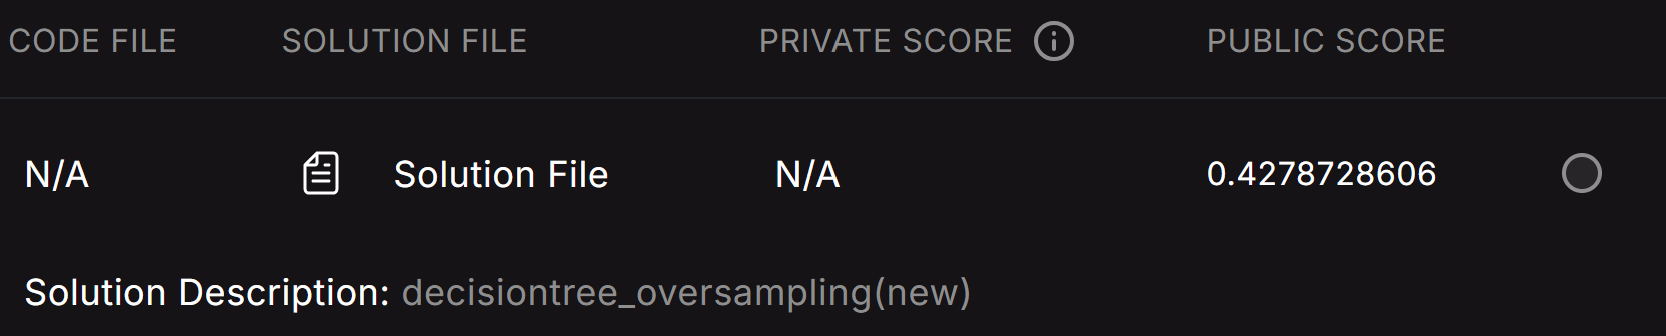

In [159]:
#grid_Search

def evaluation(train_X,train_y,val_X,val_y,model,csvname,metric):
    print("model",model)
    #make predictions
    predicted_train_tgt = model.predict(train_X)
    predicted_val_tgt = model.predict(val_X)

    #evaluate f1 score
    print(f"{metric}",metric(train_y,predicted_train_tgt))
    print(f"{metric}",metric(val_y,predicted_val_tgt))
    
    submission_data['is_promoted']=model.predict(test)
    submission_data.to_csv(f'{csvname}.csv', index=False)


In [166]:
params = [
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }    
]

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=2, scoring='f1')
grid.fit(train_X, train_y)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid=[{'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]}],
             scoring='f1')

In [168]:
model1=grid.best_estimator_
evaluation(train_X,train_y,val_X,val_y,model1,"decisiontree(Grid cv-unbalanced)",f1_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

In [288]:
grid.best_params_

{'model': DecisionTreeClassifier(),
 'model__criterion': 'entropy',
 'model__max_depth': None,
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [170]:
model1

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscalar',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy',
                                        max_leaf_nodes=20))])

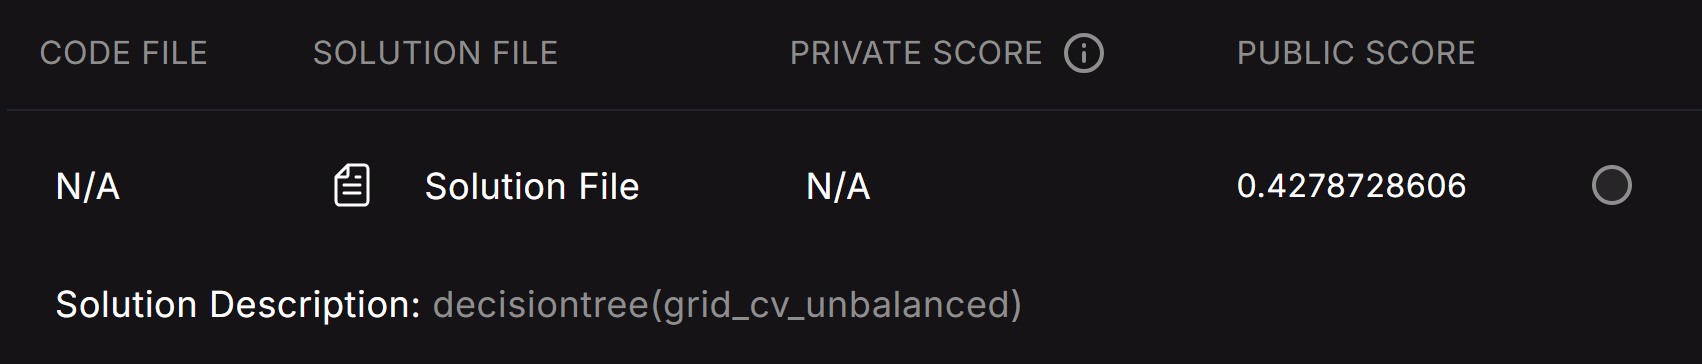

In [187]:
params = [
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }    
]

grid2 = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=2, scoring='accuracy')
grid2.fit(train_X_over_sampled, train_y_over_sampled)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid=[{'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]}],
             scoring='accuracy')

In [215]:
model2=grid2.best_estimator_
evaluation(train_X_over_sampled,train_y_over_sampled,val_X,val_y,model2,"decisiontree(Grid cv-balanced)",accuracy_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

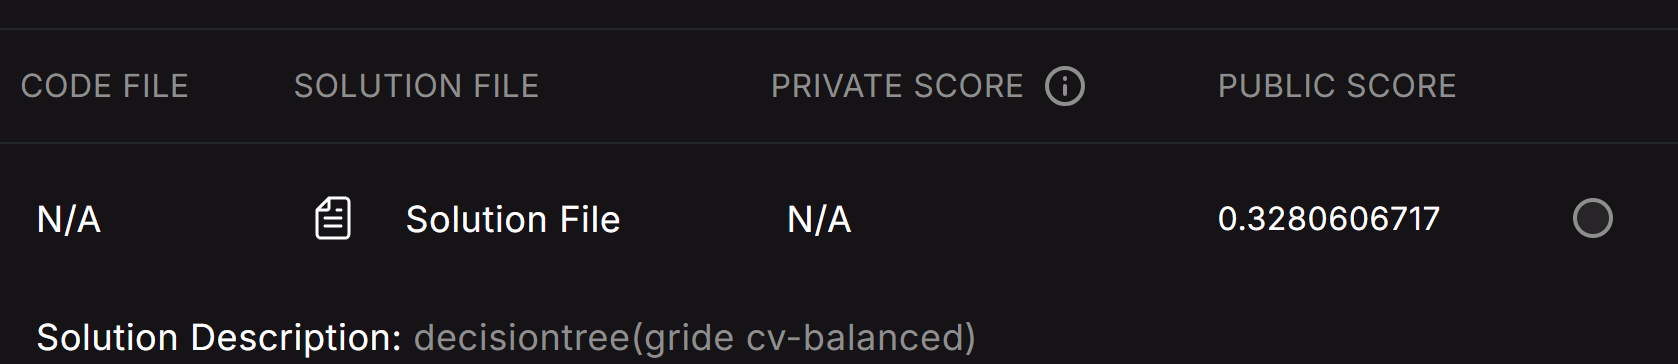

In [193]:
params3 = [
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }  ,
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }
]

grid3 = GridSearchCV(estimator=model_pipeline, param_grid=params3, cv=2, scoring='accuracy')
grid3.fit(train_X_over_sampled, train_y_over_sampled)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                                       ('model', DecisionTreeClassifier())]),
             param_grid=[{'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]},
                         {'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='accuracy')

In [217]:
model3=grid3.best_estimator_
evaluation(train_X_over_sampled,train_y_over_sampled,val_X,val_y,model3,"decisiontree and logistic(Grid cv-balanced)",accuracy_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

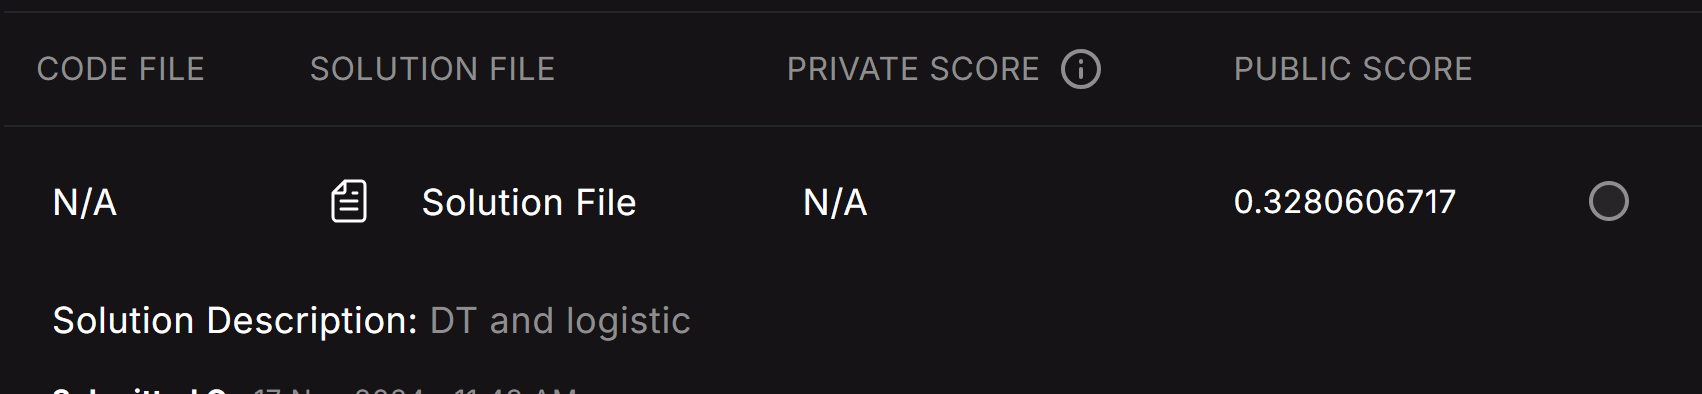

In [222]:
params4 = [
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }  ,
    {
    'model': [RandomForestClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }
]

grid4 = GridSearchCV(estimator=model_pipeline, param_grid=params4, cv=2, scoring='accuracy')
grid4.fit(train_X_over_sampled, train_y_over_sampled)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]},
                         {'model': [RandomForestClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]}],
             scoring='accuracy')

In [226]:
grid4.best_params_

{'model': DecisionTreeClassifier(),
 'model__criterion': 'entropy',
 'model__max_depth': None,
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [236]:
model4=grid4.best_estimator_
evaluation(train_X_over_sampled,train_y_over_sampled,val_X,val_y,model4,"decisiontree and randomforest(Grid cv-balanced)",accuracy_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

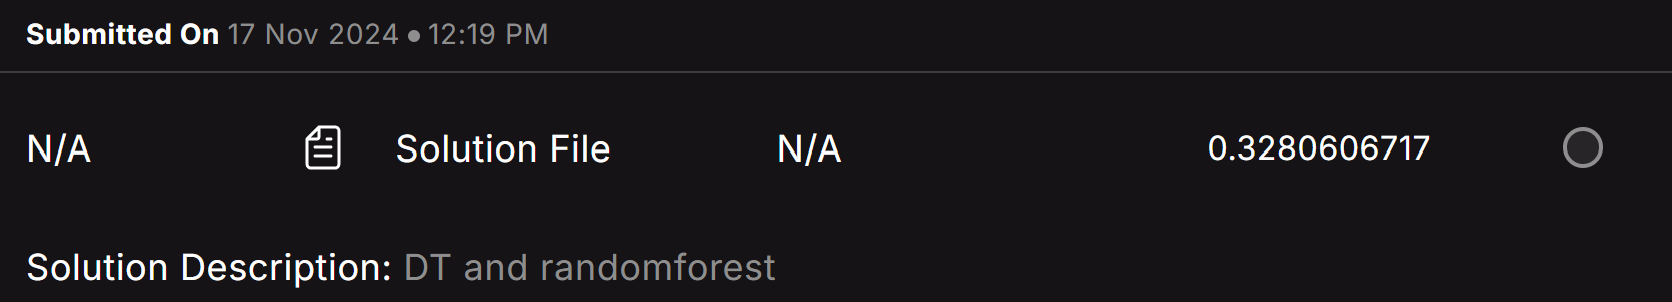

In [228]:
params5 = [
    {
    'model': [RandomForestClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }
]

grid5 = GridSearchCV(estimator=model_pipeline, param_grid=params5, cv=2, scoring='accuracy')
grid5.fit(train_X_over_sampled, train_y_over_sampled)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]}],
             scoring='accuracy')

In [238]:
model5=grid5.best_estimator_
evaluation(train_X_over_sampled,train_y_over_sampled,val_X,val_y,model5,"randomforest(Grid cv-balanced)",accuracy_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

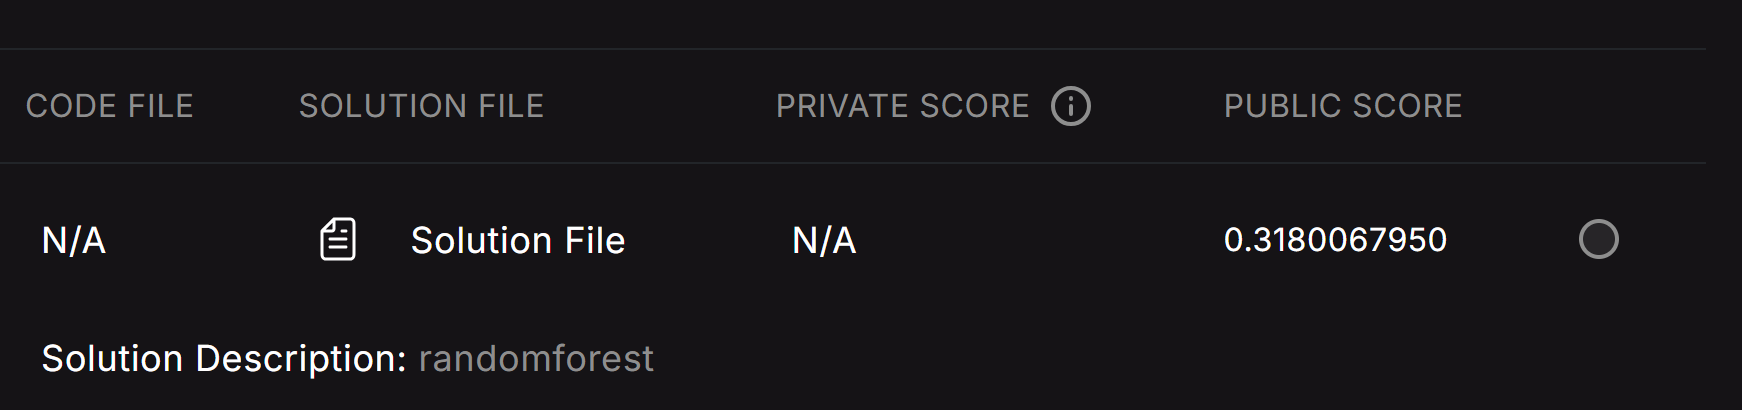

In [242]:
params6 = [
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }  ,
    {
    'model': [GradientBoostingClassifier()],
    'model__criterion': ['friedman_mse', 'squared_error'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }
]

grid6 = GridSearchCV(estimator=model_pipeline, param_grid=params6, cv=2, scoring='accuracy')
grid6.fit(train_X_over_sampled, train_y_over_sampled)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]},
                         {'model': [GradientBoostingClassifier()],
                          'model__criterion': ['friedman_mse', 'squared_error'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]}],
             scoring='accuracy')

In [244]:
model6=grid6.best_estimator_
evaluation(train_X_over_sampled,train_y_over_sampled,val_X,val_y,model6,"decisiontree,gradientboost(Grid cv-balanced)",accuracy_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

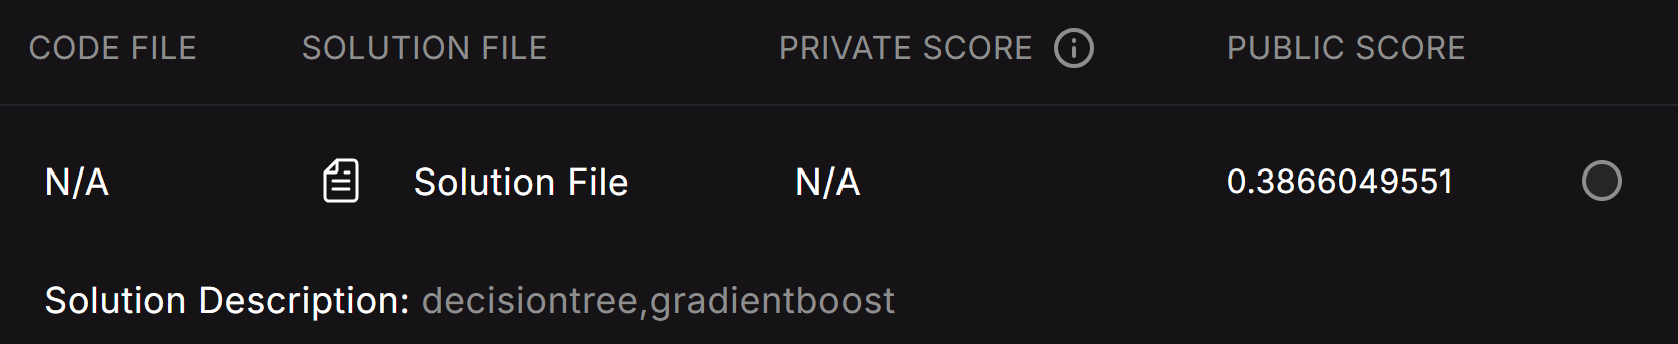

In [251]:
params7 = [
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }  ,
    {
    'model': [GradientBoostingClassifier()],
    'model__criterion': ['friedman_mse', 'squared_error'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }
]

grid7 = GridSearchCV(estimator=model_pipeline, param_grid=params7, cv=2, scoring='f1')
grid7.fit(train_X, train_y)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]},
                         {'model': [GradientBoostingClassifier()],
                          'model__criterion': ['friedman_mse', 'squared_error'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]}],
             scoring='f1')

In [259]:
model7=grid7.best_estimator_
evaluation(train_X,train_y,val_X,val_y,model7,"decisiontree,gradientboost(Grid cv-unbalanced)",f1_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

In [286]:
grid7.best_params_

{'model': GradientBoostingClassifier(),
 'model__criterion': 'friedman_mse',
 'model__max_depth': 20,
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 2}

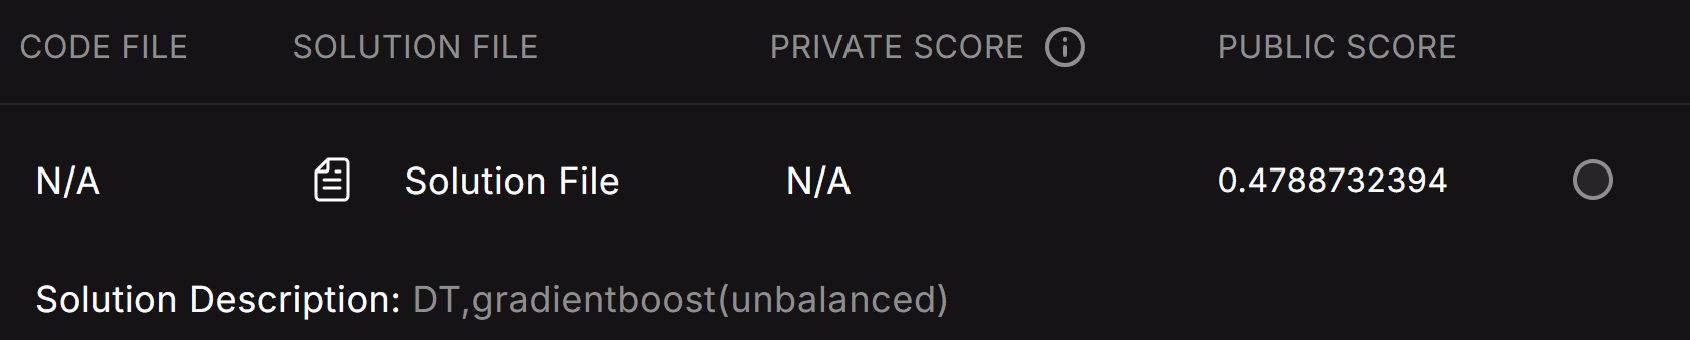

In [264]:
params8 = [
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth':[None, 10, 20],
    'model__min_samples_split':[2,5],
    'model__max_leaf_nodes':[10,20],
    'model__min_samples_leaf':[1,2]
    }  ,
    {
    'model': [AdaBoostClassifier()],
    'model__n_estimators': [50, 100,150]
    }
]

grid8 = GridSearchCV(estimator=model_pipeline, param_grid=params8, cv=2, scoring='f1')
grid8.fit(train_X, train_y)



GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                                                                          'avg_training_score'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid=[{'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_leaf_nodes': [10, 20],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5]},
                         {'model': [AdaBoostClassifier()],
                          'model__n_estimators': [50, 100, 150]}],
             scoring='f1')

In [266]:
model8=grid8.best_estimator_
evaluation(train_X,train_y,val_X,val_y,model8,"decisiontree,gradientboost(Grid cv-unbalanced)",f1_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

In [271]:
# Define StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('sclf1', RandomForestClassifier()),
        ('sclf2', GradientBoostingClassifier()),
        ('sclf3', AdaBoostClassifier())
    ],
    final_estimator=LogisticRegression()
)

params9 = [
    {
    'model': [model7]
    },
    {
    'model': [model1]
    },
    {
    'model': [stacked_model],
        'model__sclf1__max_depth': [4, 8],
        'model__sclf2__n_estimators': [15, 25],
        'model__sclf3__n_estimators': [5, 35] 
    }

]
grid9 = GridSearchCV(estimator=model_pipeline, param_grid=params9, cv=2, scoring='f1')
grid9.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy...
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_leaf_nodes=20))])]},
                         {'model': [StackingClassifier(estimators=[('sclf1',
                                                                    RandomForestClassifier()),
                                                                   ('sclf2',
                                                                    GradientBoostingClassifier()),
                                                                   ('sclf3',
                                                                    AdaBoostClassifier())],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='f1')

In [275]:
grid9.best_params_

{'model': StackingClassifier(estimators=[('sclf1', RandomForestClassifier()),
                                ('sclf2', GradientBoostingClassifier()),
                                ('sclf3', AdaBoostClassifier())],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8,
 'model__sclf2__n_estimators': 25,
 'model__sclf3__n_estimators': 35}

In [277]:
model9=grid9.best_estimator_
evaluation(train_X,train_y,val_X,val_y,model8,"stacking1(Grid cv-unbalanced)",f1_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

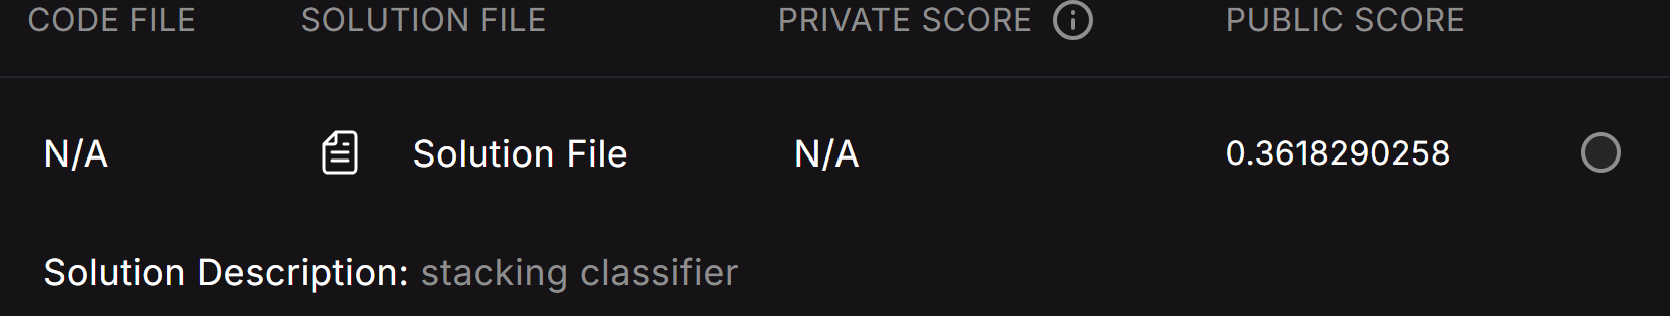

In [309]:
#stacking3
cat_pipe_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])
num_pip_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('standardscalar',StandardScaler())
])
## map tranformation to features
preprocess=ColumnTransformer(
    transformers=[
        ('cat_encode',cat_pipe_encode,cat_col),
        ('num_encode',num_pip_encode,num_col)
    ]
)
estimators = [
    ('GB', GradientBoostingClassifier(criterion='friedman_mse', max_depth= 20, max_leaf_nodes= 20, min_samples_leaf= 2, min_samples_split= 2)),
    ('gbm', xgb.XGBClassifier(eval_metric='auc')),
    ('ada', AdaBoostClassifier(n_estimators=200))    
]
model10=Pipeline(steps=[
    ('preprocess',preprocess),
    ('stacking',StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=None, max_leaf_nodes=20,min_samples_leaf=1,min_samples_split=2)))
])
model10.fit(train_X, train_y)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscalar...
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...)),
                                                ('ada',
                                                 AdaBoostClassifier(n_estimators=200))],
                                    final_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_leaf_nodes=20)))])

In [319]:
evaluation(train_X,train_y,val_X,val_y,model10,"stacking2(unbalanced)",f1_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

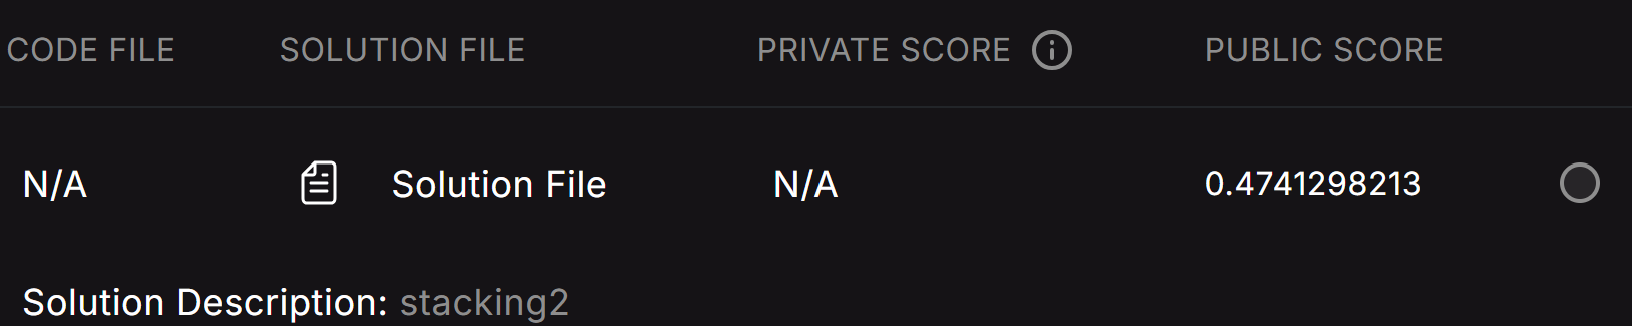

In [315]:
#stacking3
cat_pipe_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])
num_pip_encode=Pipeline(
    steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('standardscalar',StandardScaler())
])
## map tranformation to features
preprocess=ColumnTransformer(
    transformers=[
        ('cat_encode',cat_pipe_encode,cat_col),
        ('num_encode',num_pip_encode,num_col)
    ]
)
estimators = [
    ('GB1', GradientBoostingClassifier(criterion='friedman_mse', max_depth= 20, max_leaf_nodes= 20, min_samples_leaf= 2, min_samples_split= 2)),
    ('GB2', GradientBoostingClassifier(criterion='friedman_mse', max_depth= 20, max_leaf_nodes= 20, min_samples_leaf= 2, min_samples_split= 2)),  
]
model11=Pipeline(steps=[
    ('preprocess',preprocess),
    ('stacking',StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=None, max_leaf_nodes=20,min_samples_leaf=1,min_samples_split=2)))
])
model11.fit(train_X, train_y)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscalar...
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('stacking',
                 StackingClassifier(estimators=[('GB1',
                                                 GradientBoostingClassifier(max_depth=20,
                                                                            max_leaf_nodes=20,
                                                                            min_samples_leaf=2)),
                                                ('GB2',
                                                 GradientBoostingClassifier(max_depth=20,
                                                                            max_leaf_nodes=20,
                                                                            min_samples_leaf=2))],
                                    final_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_leaf_nodes=20)))])

In [321]:
evaluation(train_X,train_y,val_X,val_y,model11,"stacking3(unbalanced)",f1_score)

model Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                             

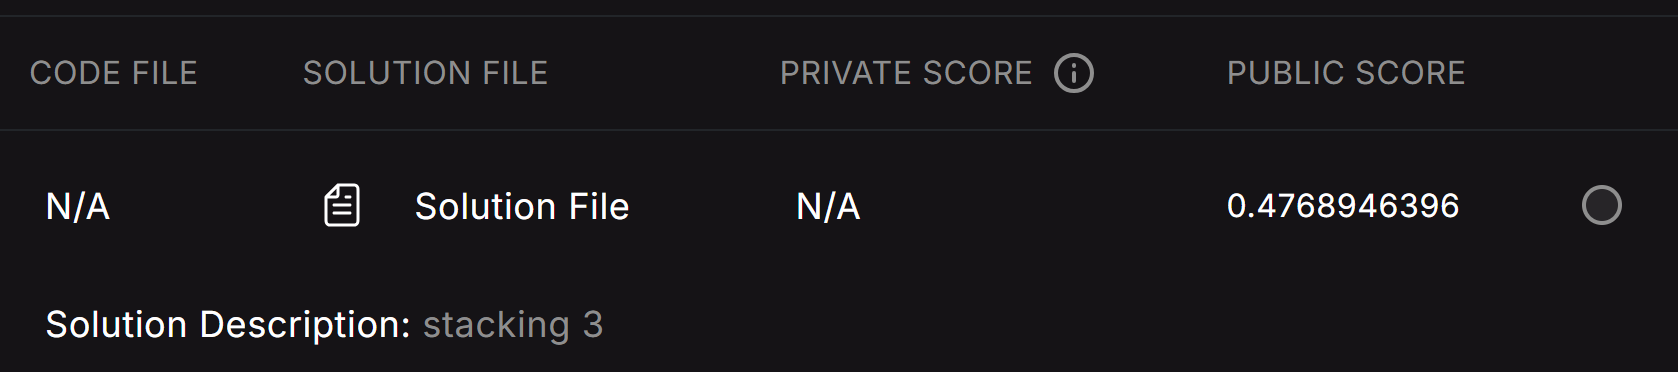

In [336]:
import joblib
joblib.dump(model7,'promotion_model.pkl')


['promotion_model.pkl']

In [338]:
train.iloc[0]

employee_id                         65438
department              Sales & Marketing
region                           region_7
education                Master's & above
gender                                  f
recruitment_channel              sourcing
no_of_trainings                         1
age                                    35
previous_year_rating                  5.0
length_of_service                       8
KPIs_met >80%                           1
awards_won?                             0
avg_training_score                     49
is_promoted                             0
Name: 0, dtype: object

In [340]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [342]:
train[train['is_promoted']==1
]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,0,81,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,1,0,86,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,0,65,1
